### Scikit-learn库分类算法

##### Scikit-learn K近邻分类器

###### 给定一组数据 X=[[0],[1],[2],[3],[4],[5]]， 对应的标签为 y=[0,0,0,1,1,1]， 现使用Scikit-learn库的k近邻分类器对未知数据[0.5, 1.6, 2.5, 2.6, 3.8, 10]进行分类，输出其对应的标签

###### 1、导入scikit-learn库的k近邻分类器模块；2、准备训练数据和对应的标签；3、获取分类器；4、将训练数据和标签送入分类器进行学习；5、对未知数据进行分类

In [12]:

from sklearn.neighbors import KNeighborsClassifier

#创建一组数据X和它对应的标签y
X=[[0],[1],[2],[3],[4],[5]]
y=[0,0,0,1,1,1]

#使用最近的3个邻居作为分类的依据，得到分类器
neigh = KNeighborsClassifier(n_neighbors=1, weights='distance')

#将训练数据 X和标签y送入分类器进行学习
neigh.fit(X, y)

#调用 predict() 函数，对未知分类样本 [1.1]分类，可以直接并将需要分类
#的数据构造为数组形式作为参数传入，得到分类标签作为返回值

print(neigh.predict([[1.4]]))
print(neigh.predict([[2.4]]))
print(neigh.predict([[2.5]]))
print(neigh.predict([[2.6]]))
print(neigh.predict([[100.9]]))


[0]
[0]
[0]
[1]
[1]


#### Scikit-learn 决策树

##### 鸢尾花分类实战

###### 数据集简介

鸢尾花数据集是机器学习领域一个非常经典的分类数据集。接下来，我们就用这个训练集为基础，一步一步地训练一个机器学习模型。首先，我们来看一下该数据集的基本构成。数据集名称的准确名称为 Iris Data Set，总共包含 150 行数据。每一行数据由 4 个特征值及一个目标值组成。其中 4 个特征值分别为：萼片长度、萼片宽度、花瓣长度、花瓣宽度。而目标值及为三种不同类别的鸢尾花，分别为：Iris Setosa，Iris Versicolour，Iris Virginica。
 ![title](Iris_data.png)

###### 获取数据

In [19]:
from sklearn import datasets # 导入方法类

iris = datasets.load_iris() # 加载 iris 数据集
iris_feature = iris.data # 特征数据
iris_target = iris.target # 分类数据

iris_target # 查看 iris_target(这里，scikit-learn 已经将花的原名称进行了转换，其中 0, 1, 2 分别代表 Iris Setosa, Iris Versicolour 和 Iris Virginica。)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

这里，scikit-learn 已经将花的原名称进行了转换，其中 0, 1, 2 分别代表 Iris Setosa, Iris Versicolour 和 Iris Virginica。

这些数据是按照鸢尾花类别的顺序排列的。所以，如果我们将其直接划分为训练集和数据集的话，就会造成数据的分布不均。详细来讲，直接划分容易造成某种类型的花在训练集中一次都未出现，训练的模型就永远不可能预测出这种花来。你可能会想到，我们将这些数据打乱后再划分训练集和数据集。当然，更方便地，scikit-learn 为我们提供了训练集和数据集的方法。

In [20]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(iris_feature, iris_target, test_size=0.33, random_state=42)

target_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

其中，feature_train, feature_test, target_train, target_test 分别代表训练集特征、测试集特征、训练集目标值、测试集目标值。test_size 参数代表划分到测试集数据占全部数据的百分比，你也可以用 train_size 来指定训练集所占全部数据的百分比。一般情况下，我们会将整个训练集划分为 70% 训练集和 30% 测试集。最后的 random_state 参数表示乱序程度。

现在，花的种类已经变成了乱序状态，并且只包含有整个训练集的 70% 数据。


#### 模型训练和预测

导入决策树分类器，然后使用fit方法和predict方法对模型进行训练和预测。

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier() # 所以参数均置为默认状态
dt_model.fit(feature_train,target_train) # 使用训练集训练模型
predict_results = dt_model.predict(feature_test) # 使用模型对测试集进行预测

分别输出预测结果和测试集的真实值进行比较

In [23]:
print('predict_results:', predict_results)
print('target_test:', target_test)

predict_results: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
target_test: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


可以通过 scikit-learn 中提供的评估计算方法查看预测结果的准确度。

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(predict_results, target_test))

0.98


#### Scikit-learn 朴素贝叶斯算法分类

训练数据 X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
对应标签 Y = np.array([1, 1, 1, 2, 2, 2])

分类未知数据[-0.8, -1]

In [24]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

#使用默认参数，创建一个高斯朴素贝叶斯分类器，并将该分类器赋给变量clf
clf = GaussianNB(priors=None)
clf.fit(X, Y)
print(clf.predict([[-0.8, -1]]))

[1]


### Scikit-learn回归算法

线性回归拟合房屋面积与房屋价格

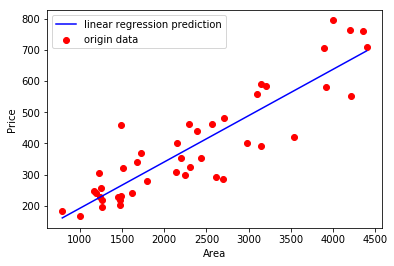

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# 读取数据集
datasets_X = []#房屋面积
datasets_Y = []#房屋价格
fr = open('prices.txt','r')
lines = fr.readlines()
for line in lines:
    items = line.strip().split(',')
    datasets_X.append(int(items[0]))#注意加上类型转换
    datasets_Y.append(int(items[1]))


#将datasets_X转换为二维数组，以符合 linear.fit 函数的参数要求
datasets_X = np.array(datasets_X).reshape([-1,1])
datasets_Y = np.array(datasets_Y)

#以数据datasets_X的最大值和最小值为范围，建立等差数列，方便后续画图。
minX = min(datasets_X)
maxX = max(datasets_X)
X = np.arange(minX,maxX).reshape([-1,1])


linear = linear_model.LinearRegression()
linear.fit(datasets_X, datasets_Y)

# 图像中显示

plt.scatter(datasets_X, datasets_Y, color = 'red',label='origin data')
plt.plot(X, linear.predict(X), color = 'blue',label='linear regression prediction')
plt.legend()#使label生效
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()